In [1]:
import sys
sys.path.append('../')  
from CO import CuckooOptimizer
from BatO import BatOptimizer
from Visualizer import Visualizer
from TestFunctions import *
import numpy as np
import numpy as np
import matplotlib.pyplot as plt


In [4]:
CO = CuckooOptimizer(rastrigin2d, [-5.12, -5.12], [5.12, 5.12], epochs=50, population_size=20, dimensions=2)
print(CO.fit())
data = CO._meta
v = Visualizer(data=data, func=rastrigin2d, interval=[[-5.12, 5.12], [-5.12, 5.12]], dimensions=2, fps=5, filename="RASTRIGIN_CO2", best=data["best_fitness"])
v.animate_growth()
v.fitness_trend()
v.distances()

[-1.9844263494836443, 0.0655876336556459]


In [12]:
CO = CuckooOptimizer(rastrigin10d, [-5.12] * 10, [5.12] * 10,  epochs=100, population_size=20, dimensions=10)
print(CO.fit())
data = CO._meta
v = Visualizer(data=data, func=rastrigin10d, interval=[[-5.12, 5.12] * 10], dimensions=10, fps=5, filename="RASTRIGIN10_CO", best=data["best_fitness"])
v.fitness_trend()
v.distances()

[0.0912391691005075, 1.9620291998994515, 1.9068482089875398, 2.247366964328368, 2.131387205534003, 1.9743369439333713, 0.9488979584496727, -3.661927297983672, -1.013092739223669, 3.8569672136240563]


In [38]:
CO = CuckooOptimizer(mishra_berd, [-10, -6.5], [0, 0],  epochs=5000, population_size=20, dimensions=2)
print(CO.fit())
data = CO._meta
v = Visualizer(data=data, func=mishra_berd, interval=[[-10, 0], [-6.5, 0]], dimensions=2, fps=5, filename="MISHRABERD_СO", best=data["best_fitness"])
#v.animate_growth()
v.fitness_trend()
v.distances()

[-2.4166252302096645, -4.145302980496697]


In [7]:
BO = BatOptimizer(rastrigin2d, [-5.12, -5.12], [5.12, 5.12], 10, 50, epochs=100, population_size=20, dimensions=2)
print(BO.fit())
data = BO._meta
v = Visualizer(data=data, func=rastrigin2d, interval=[[-5.12, 5.12], [-5.12, 5.12]], dimensions=2, fps=5, filename="RASTRIGIN_BO", best=data["best_fitness"])
v.animate_growth()
v.fitness_trend()
v.distances()

[1.0328548975366143, -0.0014220026741737155]


In [10]:
BO = BatOptimizer(rastrigin10d, [-5.12] * 10, [5.12] * 10, 1, 5, epochs=100, population_size=20, dimensions=10)
print(BO.fit())
data = BO._meta
v = Visualizer(data=data, func=rastrigin10d, interval=[[-5.12, 5.12] * 10], dimensions=10, fps=5, filename="RASTRIGIN10_BO", best=data["best_fitness"])
v.fitness_trend()
v.distances()

[-0.7520351976667055, -5.12, 0.0204111462302784, -2.3185127401739942, 1.146948763894588, 0.8922540091097377, 1.9838121328939031, -1.9186418344045642, 0.14494437541181604, -1.2718978700802543]


In [17]:
BO = BatOptimizer(mishra_berd, [-10, -6.5], [0, 0], 1, 2, epochs=5000, population_size=20, dimensions=2)
print(BO.fit())
data = BO._meta
v = Visualizer(data=data, func=mishra_berd, interval=[[-10, 0], [-6.5, 0]], dimensions=2, fps=5, filename="MISHRABERD_BO", best=data["best_fitness"])
#v.animate_growth()
v.fitness_trend()
v.distances()

[-5.015664784047042, -1.3247447510322998]


# Shooting method

/var/folders/kl/jfwvxx3s68qd0pvk126hj5w40000gn/T/ipykernel_25266/2398844914.py:25: RuntimeWarning: overflow encountered in scalar power
  y[k + 1] = y[k] + h * (y[k]**4 + x[k]**3 - 3 * np.sin(t[k]**2))
/var/folders/kl/jfwvxx3s68qd0pvk126hj5w40000gn/T/ipykernel_25266/2398844914.py:26: RuntimeWarning: invalid value encountered in cos
  z[k + 1] = z[k] + h * (x[k]**2 + t[k]**2 - y[k]**2 * np.cos(z[k]))
/var/folders/kl/jfwvxx3s68qd0pvk126hj5w40000gn/T/ipykernel_25266/2398844914.py:26: RuntimeWarning: overflow encountered in scalar power
  z[k + 1] = z[k] + h * (x[k]**2 + t[k]**2 - y[k]**2 * np.cos(z[k]))
/var/folders/kl/jfwvxx3s68qd0pvk126hj5w40000gn/T/ipykernel_25266/2398844914.py:25: RuntimeWarning: invalid value encountered in scalar add
  y[k + 1] = y[k] + h * (y[k]**4 + x[k]**3 - 3 * np.sin(t[k]**2))


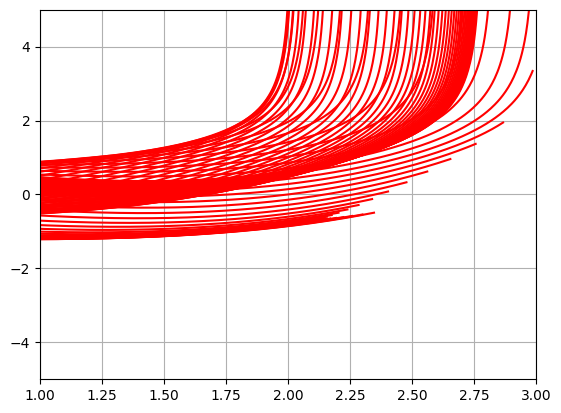

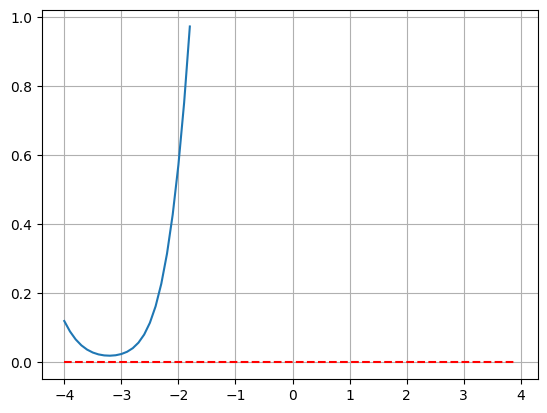

In [56]:

# Define parameters
xa = 1
xb = 3
N = 3001
h = (xb - xa) / (N - 1)
t = np.linspace(xa, xb, N)
x = np.zeros(N)
y = np.zeros(N)
y[0] = 1
x[2] = 3

# Define the range for alpha
alpha_range = np.arange(-4, 4, 0.1)
F = np.zeros_like(alpha_range)

# Plotting
plt.figure()

for alpha_index, alpha in enumerate(alpha_range):
    z = np.zeros(N)
    z[0] = alpha
    
    for k in range(N - 1):
        x[k + 1] = x[k] + h * z[k]
        y[k + 1] = y[k] + h * (y[k]**4 + x[k]**3 - 3 * np.sin(t[k]**2))
        z[k + 1] = z[k] + h * (x[k]**2 + t[k]**2 - y[k]**2 * np.cos(z[k]))
    
    plt.plot(x, y, 'r')
    plt.grid(True)
    plt.axis([xa, xb, -5, 5])
    
    F[alpha_index] = (x[N-1] - 2) ** 2

plt.figure()
plt.plot(alpha_range, F)
plt.plot(alpha_range, np.zeros_like(alpha_range), 'r--')  # Plot zero line
plt.grid(True)
plt.show()


/var/folders/kl/jfwvxx3s68qd0pvk126hj5w40000gn/T/ipykernel_19030/520520870.py:25: RuntimeWarning: overflow encountered in scalar power
  x[k + 1] = x[k] + h * (x[k]**2 - 5 * t[k]**2 - z[k]**2 * np.cos(2 * t[k] + y[k]))
/var/folders/kl/jfwvxx3s68qd0pvk126hj5w40000gn/T/ipykernel_19030/520520870.py:26: RuntimeWarning: overflow encountered in scalar power
  z[k + 1] = z[k] + h * (4 + y[k]**3 * x[k]**2 + 4 * np.sin(t[k] * (x[k]**2 - 5 * t[k]**2 - z[k]**2 * np.cos(2 * t[k] + z[k]))))
/var/folders/kl/jfwvxx3s68qd0pvk126hj5w40000gn/T/ipykernel_19030/520520870.py:26: RuntimeWarning: invalid value encountered in scalar subtract
  z[k + 1] = z[k] + h * (4 + y[k]**3 * x[k]**2 + 4 * np.sin(t[k] * (x[k]**2 - 5 * t[k]**2 - z[k]**2 * np.cos(2 * t[k] + z[k]))))
/var/folders/kl/jfwvxx3s68qd0pvk126hj5w40000gn/T/ipykernel_19030/520520870.py:30: RuntimeWarning: overflow encountered in scalar power
  F[alpha_index] = (y[N-1]) ** 2
/var/folders/kl/jfwvxx3s68qd0pvk126hj5w40000gn/T/ipykernel_19030/520520870.py

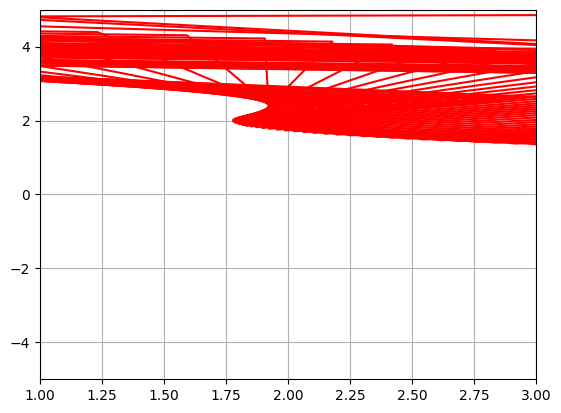

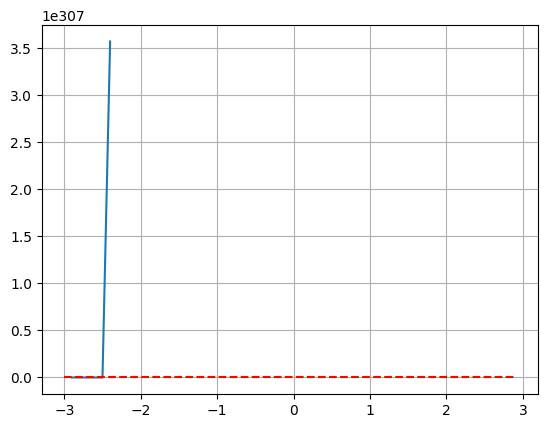

In [36]:
# Define parameters
xa = 1
xb = 3
N = 10
h = (xb - xa) / (N - 1)
t = np.linspace(xa, xb, N)
x = np.zeros(N)
y = np.zeros(N)
y[0] = 2
x[0] = 2

# Define the range for alpha
alpha_range = np.arange(-3, 3, 0.1)
F = np.zeros_like(alpha_range)

# Plotting
plt.figure()

for alpha_index, alpha in enumerate(alpha_range):
    z = np.zeros(N)
    z[0] = alpha
    
    for k in range(N - 1):
        y[k + 1] = y[k] + h * z[k]
        x[k + 1] = x[k] + h * (x[k]**2 - 5 * t[k]**2 - z[k]**2 * np.cos(2 * t[k] + y[k]))
        z[k + 1] = z[k] + h * (4 + y[k]**3 * x[k]**2 + 4 * np.sin(t[k] * (x[k]**2 - 5 * t[k]**2 - z[k]**2 * np.cos(2 * t[k] + z[k]))))
    plt.plot(x, y, 'r')
    plt.grid(True)
    plt.axis([xa, xb, -5, 5])
    F[alpha_index] = (y[N-1]) ** 2

plt.figure()
plt.plot(alpha_range, F)
plt.plot(alpha_range, np.zeros_like(alpha_range), 'r--')  # Plot zero line
plt.grid(True)
plt.show()


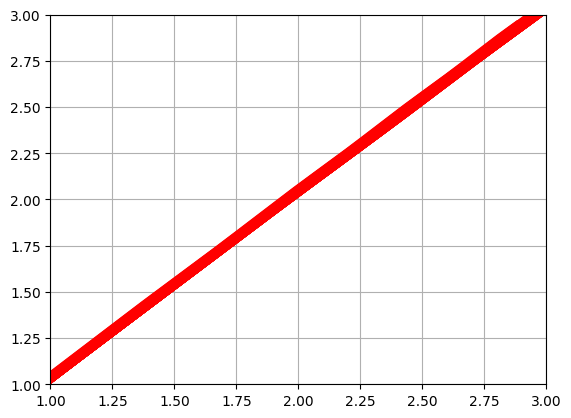

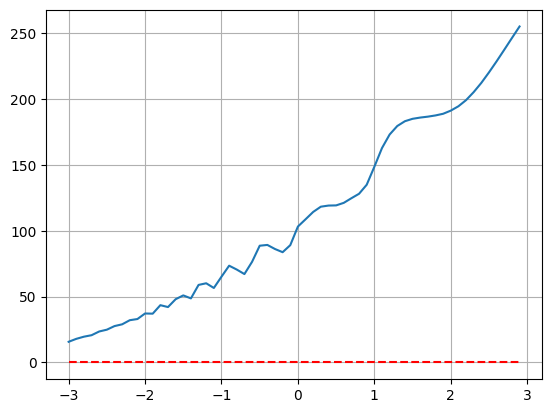

In [26]:
# Define parameters
xa = 1
xb = 3
N = 1000
h = (xb - xa) / (N - 1)
t = np.linspace(xa, xb, N)
x = np.zeros(N)
y = np.zeros(N)
y[0] = 1
x[0] = 1

# Define the range for alpha
alpha_range = np.arange(-3, 3, 0.1)
F = np.zeros_like(alpha_range)

# Plotting
plt.figure()

for alpha_index, alpha in enumerate(alpha_range):
    z = np.zeros(N)
    z[0] = alpha
    
    for k in range(N - 1):
        y[k + 1] = y[k] + h * z[k]
        x[k + 1] = y[k] + h * (x[k]**2 - 5 * t[k]**2 + np.sin(x[k] * y[k] * t[k]))
        z[k + 1] = z[k] + h * (4 - 2 * np.cos(t[k] * (x[k]**2 - 5 * t[k]**2 + np.sin(x[k] * y[k] * t[k]))))
    plt.plot(x, y, 'r')
    plt.grid(True)
    plt.axis([xa, xb, 1, 3])
    F[alpha_index] = (y[N-1] + 1) ** 2

plt.figure()
plt.plot(alpha_range, F)
plt.plot(alpha_range, np.zeros_like(alpha_range), 'r--')  # Plot zero line
plt.grid(True)
plt.show()
